In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from matplotlib.patches import Patch

In [271]:
fccmap = mcolors.LinearSegmentedColormap.from_list("", ["#FFA726","#FFA726"])
diamap = mcolors.LinearSegmentedColormap.from_list("", ["#EF5350","#EF5350"])
bccmap = mcolors.LinearSegmentedColormap.from_list("", ["#8BC34A","#8BC34A"])

# Stillinger Weber space

The idea is to the span the whole stillinger weber space and calculate different parameters wherever possible. This dataset will then be used to tune a potential later on.

The parameters that would be varied are $\epsilon$, $\sigma$, $a$ and $\lambda$. The possible ranges for these parameters were identified based on existing literature.
The range are `0.5-2.5`, `0.5-3.0`, `1.0-6.0` and `0-33` respectively. $\lambda$ could further be increased.

A sample stillineger weber file

```
# format of a single entry (one or more lines):
#   element 1, element 2, element 3, 
#   epsilon, sigma, a, lambda, gamma, costheta0, A, B, p, q, tol

# Here are the original parameters in metal units, for Silicon from:
#
# Stillinger and Weber,  Phys. Rev. B, v. 31, p. 5262, (1985)
#

Si Si Si 2.1683  2.0951  1.80  21.0  1.20  -0.333333333333
         7.049556277  0.6022245584  4.0  0.0 0.0
```

## Analysing the space

In [246]:
df = pd.read_hdf("data_set_5.hdf")

In [247]:
df.head()

,epsilon,sigma,a,lambda,Ebcc,Vbcc,Efcc,Vfcc,Edia,Vdia
0,2.5,1.75,1.8,0.000000,-0.00045,20.800785,-10.915537,10.400392,-4.730505,15.160922
1,2.5,1.75,1.8,0.673469,-0.00045,20.800785,-11.995949,10.400392,-4.730505,15.160922
2,2.5,1.75,1.8,1.346939,-0.00045,20.800785,-14.063466,10.400392,-4.730505,15.160922
3,2.5,1.75,1.8,2.020408,-0.00045,20.800785,-18.867367,10.400392,-4.730505,15.160922
4,2.5,1.75,1.8,2.693878,-0.00045,20.800785,-36.137804,10.400392,-4.730505,15.160922


bcc range

In [248]:
bmax = (np.nanmax(df.iloc[:, 4].values))
bmin = (np.nanmin(df.iloc[:, 4].values))

fcc range

In [249]:
fmax = (np.nanmax(df.iloc[:, 6].values))
fmin = (np.nanmin(df.iloc[:, 6].values))

dia range

In [250]:
dmax = (np.nanmax(df.iloc[:,8].values))
dmin = (np.nanmin(df.iloc[:, 8].values))

Fill NaNs with maximum value

In [251]:
maxmax = max([bmax, fmax, dmax])

In [252]:
maxmax

75.5938162165283

In [253]:
dfs = df.fillna(maxmax)

In [254]:
efcc = np.array(dfs["Efcc"])
ebcc = np.array(dfs["Ebcc"])
edia = np.array(dfs["Edia"])

In [255]:
sigma = dfs['sigma']
lmbda = dfs['lambda']

In [256]:
for i in range(len(efcc)):
    if efcc[i]/2.5 < -4:
        efcc[i] = maxmax
    if edia[i]/2.5 < -4:
        edia[i] = maxmax
    if ebcc[i]/2.5 < -4:
        ebcc[i] = maxmax

Assign stable regions

In [257]:
labels = []
for i in range(len(efcc)):
    minE = ebcc[i]
    label = 0
    if efcc[i] < minE:
        minE = efcc[i]
        label = 1
    if edia[i] < minE:
        minE = edia[i]
        label = 2
    #if minE != -11:
    labels.append(label)
    #else:
    #    labels.append(5)

Now remove the other values to max

In [258]:

for i in range(len(efcc)):
    if labels[i] == 0:
        efcc[i] = maxmax
        edia[i] = maxmax
    elif labels[i] == 1:
        ebcc[i] = maxmax
        edia[i] = maxmax
    elif labels[i] == 2:
        efcc[i] = maxmax
        ebcc[i] = maxmax

In [259]:
sigma = np.array(sigma).reshape((50,50))
lmbda = np.array(lmbda).reshape((50,50))

In [260]:
edfcc = np.array(efcc).reshape((50,50))
edbcc = np.array(ebcc).reshape((50,50))
eddia = np.array(edia).reshape((50,50))

In [261]:
labelss = np.array(labels).reshape((50,50))

Text(0.2, 0.8, 'dia')

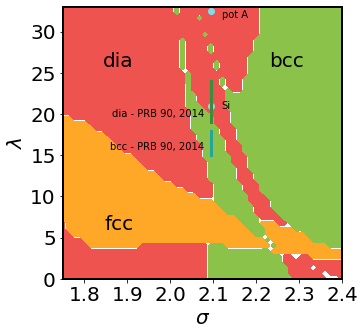

In [291]:
fontdict = {'fontsize':20}
plt.rc('axes', linewidth=2)
fig = plt.figure(figsize=((5, 5)))
ax = fig.add_subplot(111)

ax.set_xticks(np.arange(1.7,2.5,0.1))
ax.set_xticklabels(np.around(np.arange(1.7,2.5,0.1), decimals=1), fontdict=fontdict)
ax.set_yticks(np.arange(0,34,5))
ax.set_yticklabels(np.around(np.arange(0,34,5), decimals=0), fontdict=fontdict)
ax.set_xlabel("$\sigma$", fontdict=fontdict)
ax.set_ylabel("$\lambda$", fontdict=fontdict)

ax.contourf(sigma, lmbda, edfcc, levels=np.arange(fmin-4, 25, 5), cmap=fccmap)
ax.contourf(sigma, lmbda, eddia, levels=np.arange(dmin-4, 25, 5), cmap=diamap)
ax.contourf(sigma, lmbda, edbcc, levels=np.arange(bmin-4, 25, 5), cmap=bccmap)
ax.scatter([2.0951],[32.5], c="#80DEEA")
ax.plot([2.0951, 2.0951],[15, 17.9], c="#26A69A", linewidth=3)
ax.plot([2.0951, 2.0951],[19, 24], c="#388E3C", linewidth=3)
ax.scatter([2.0951],[21.0], c="#80DEEA")

plt.text(2.12, 32, 'pot A', horizontalalignment='left', verticalalignment='center', fontsize=10)
plt.text(2.08, 16, 'bcc - PRB 90, 2014', horizontalalignment='right', verticalalignment='center', fontsize=10)
plt.text(2.08, 20, 'dia - PRB 90, 2014', horizontalalignment='right', verticalalignment='center', fontsize=10)
plt.text(2.12, 21, 'Si', horizontalalignment='left', verticalalignment='center', fontsize=10)

plt.text(0.8, 0.8, 'bcc', horizontalalignment='center', verticalalignment='center', fontsize=20, transform=ax.transAxes)
plt.text(0.2, 0.2, 'fcc', horizontalalignment='center', verticalalignment='center', fontsize=20, transform=ax.transAxes)
plt.text(0.2, 0.8, 'dia', horizontalalignment='center', verticalalignment='center', fontsize=20, transform=ax.transAxes)
#ax.legend(fontsize=10)
#plt.savefig('/home/users/menonsqr/ph_dia_hysterisis.png', dpi=450, bbox_inches='tight')

### $\epsilon$ = 2.5 and $a$ = 1.8

pot a - 2.16, 2.09, 1.8, 32.5 
pot b - 2.16, 2.37, 1.53, 32.5

In [108]:
2.37*1.53/1.8

2.0145